In [13]:
import pandas as pd

from src.config import TRAIN_SET_PATH, RANDOM_STATE

train_set = pd.read_csv(TRAIN_SET_PATH, index_col=0)

train_set

,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,...,hesitation_ratio,total_hesitations,average_duration,max_duration,hesitation_periods,number_of_crosses,invalid_cause,sex,age,group
0,1,8,PART_A,True,2,0.262139,3.756078,18105,15.0,3.0,...,0.654418,1.0,4.333857,4.333857,[4.333857099999932],NaN,NaN,F,52,HC
1,1,7,PART_B,True,3,0.262139,3.451943,18091,15.0,3.0,...,0.203475,1.0,0.735873,0.735873,[0.7358727999999246],NaN,NaN,F,52,HC
2,1,11,PART_A,True,4,0.262139,3.522551,15807,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
3,1,21,PART_B,True,5,0.262139,3.349920,21544,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
4,1,1,PART_A,True,6,0.262139,3.910085,18099,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,99,0,PART_B,True,17,0.139271,3.614743,18984,15.0,2.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,71,MCI
1936,99,21,PART_A,True,18,0.139271,5.412710,21924,15.0,12.0,...,0.497201,5.0,0.780583,1.766734,"[0.3000841001048684, 1.766733500175178, 1.4024...",NaN,NaN,F,71,MCI
1937,99,3,PART_B,True,19,0.139271,3.662643,18612,15.0,3.0,...,0.019453,1.0,0.069026,0.069026,[0.06902600033208728],NaN,NaN,F,71,MCI
1938,99,8,PART_A,True,20,0.139271,4.016559,16072,15.0,1.0,...,0.175622,1.0,0.733461,0.733461,[0.7334607001394033],NaN,NaN,F,71,MCI


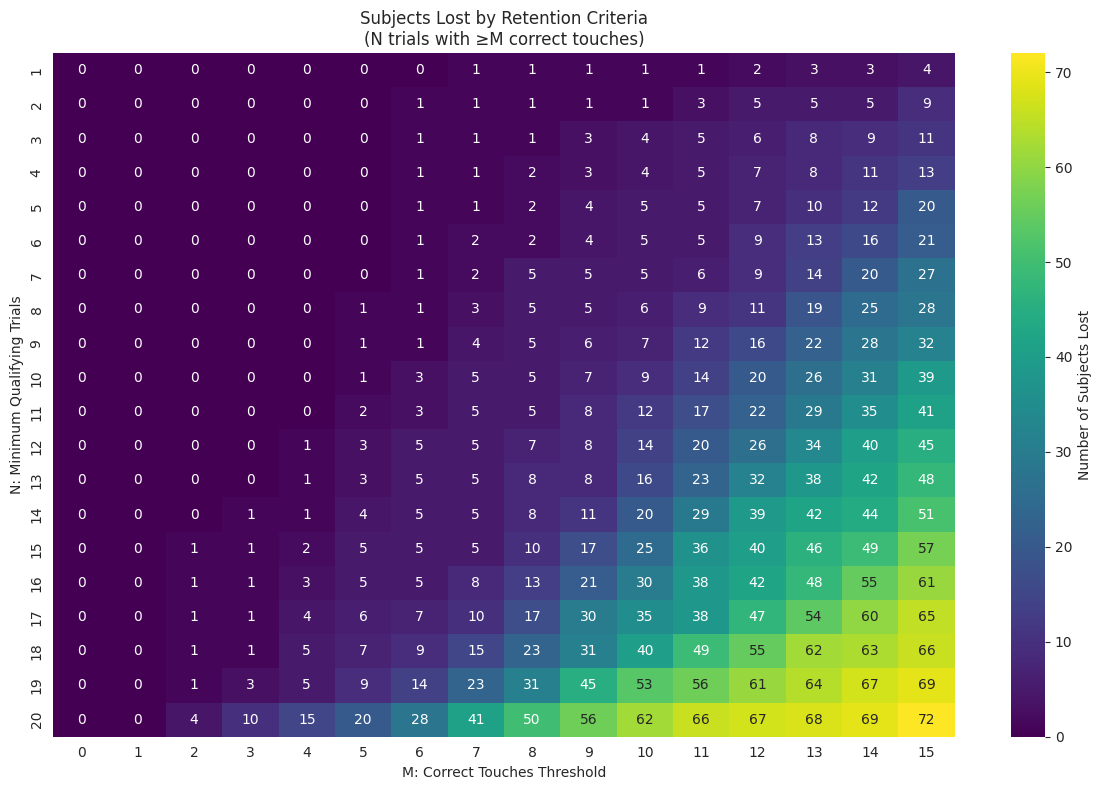

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

subjects = train_set['subject_id'].unique()
total_subjects = len(subjects)

# Maximum number of trials per subject (should be 15)
max_trials = train_set['trial_id'].nunique()

# Prepare a grid for N (required number of qualifying trials) and M (threshold correct touches)
N_values = range(1, max_trials + 1)  # 1 through 15
M_values = range(0, 16)  # 0 through 15 possible touches

# Initialize a DataFrame to store the number of subjects lost for each (N, M)
lost_matrix = pd.DataFrame(index=N_values, columns=M_values)

# Precompute per-subject counts for each M threshold
# subject_counts[M] = number of trials where correct_targets_touches >= M
subject_counts = pd.DataFrame(index=subjects, columns=M_values)

for M in M_values:
    counts = train_set.groupby('subject_id')['correct_targets_touches'] \
        .apply(lambda touches: (touches >= M).sum())
    subject_counts[M] = counts

# Compute lost subjects for each (N, M)
for N in N_values:
    for M in M_values:
        retained = (subject_counts[M] >= N).sum()
        lost = total_subjects - retained
        lost_matrix.at[N, M] = lost

# Plot heatmap of lost subjects
plt.figure(figsize=(12, 8))
sns.heatmap(
    lost_matrix.astype(int),
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar_kws={'label': 'Number of Subjects Lost'}
)
plt.title('Subjects Lost by Retention Criteria\n(N trials with ≥M correct touches)')
plt.xlabel('M: Correct Touches Threshold')
plt.ylabel('N: Minimum Qualifying Trials')
plt.tight_layout()
plt.show()

In [3]:
train_set

,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,...,hesitation_ratio,total_hesitations,average_duration,max_duration,hesitation_periods,number_of_crosses,invalid_cause,sex,age,group
0,1,8,PART_A,True,2,0.262139,3.756078,18105,15.0,3.0,...,0.654418,1.0,4.333857,4.333857,[4.333857099999932],NaN,NaN,F,52,HC
1,1,7,PART_B,True,3,0.262139,3.451943,18091,15.0,3.0,...,0.203475,1.0,0.735873,0.735873,[0.7358727999999246],NaN,NaN,F,52,HC
2,1,11,PART_A,True,4,0.262139,3.522551,15807,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
3,1,21,PART_B,True,5,0.262139,3.349920,21544,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
4,1,1,PART_A,True,6,0.262139,3.910085,18099,15.0,4.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,52,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,99,0,PART_B,True,17,0.139271,3.614743,18984,15.0,2.0,...,0.000000,0.0,0.000000,0.000000,[],NaN,NaN,F,71,MCI
1936,99,21,PART_A,True,18,0.139271,5.412710,21924,15.0,12.0,...,0.497201,5.0,0.780583,1.766734,"[0.3000841001048684, 1.766733500175178, 1.4024...",NaN,NaN,F,71,MCI
1937,99,3,PART_B,True,19,0.139271,3.662643,18612,15.0,3.0,...,0.019453,1.0,0.069026,0.069026,[0.06902600033208728],NaN,NaN,F,71,MCI
1938,99,8,PART_A,True,20,0.139271,4.016559,16072,15.0,1.0,...,0.175622,1.0,0.733461,0.733461,[0.7334607001394033],NaN,NaN,F,71,MCI


In [27]:
X_train = train_set.groupby('subject_id').mean(numeric_only=True).drop(
    columns=['trial_id', 'trial_order_of_appearance', 'number_of_crosses', 'invalid_cause', 'is_valid'])
y_train = train_set.groupby('subject_id')['group'].first()

In [28]:
X_train

,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,mean_speed,std_speed,peak_speed,mean_acceleration,std_acceleration,...,search_distance,hesitation_avg_speed,travel_avg_speed,search_avg_speed,state_transitions,hesitation_ratio,total_hesitations,average_duration,max_duration,age
subject_id,,,,,,,,,,,,,,,,,,,,,
1,0.262139,3.509150,17501.25,14.40,3.40,0.226992,0.350061,2.437747,0.008104,6.764005,...,2.157154,0.098462,0.521533,0.172328,24.50,0.056511,0.40,0.282126,0.285409,52.0
2,0.207211,3.448420,23444.95,11.80,2.80,0.171218,0.333334,3.306495,-0.015210,8.870451,...,2.039753,0.211647,0.499668,0.124506,19.85,0.254538,1.50,0.653990,0.933707,78.0
3,0.175732,3.661742,23978.35,12.55,3.35,0.184492,0.294910,2.320141,-0.023695,5.327898,...,1.952802,0.213519,0.476212,0.128988,24.30,0.256479,1.95,0.702637,1.101315,68.0
4,0.341186,4.327987,21933.10,12.85,7.00,0.237995,0.317433,2.517528,-0.000174,5.493805,...,1.962182,0.250170,0.406470,0.196549,33.50,0.572534,8.85,0.557678,1.665068,80.0
5,0.204133,3.827204,24991.00,8.90,6.55,0.173843,0.383814,4.278978,-0.032531,8.562208,...,1.488376,0.188973,0.383877,0.117731,25.05,0.576951,6.95,0.876227,2.505668,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.132127,3.268515,23325.20,12.55,2.20,0.175295,0.276728,2.049060,-0.004297,5.450470,...,1.682289,0.181715,0.418195,0.121164,23.30,0.133692,1.25,0.453819,0.549066,70.0
94,0.166636,1.756736,25014.40,5.50,2.90,0.089201,0.232465,2.501104,-0.023565,4.330458,...,0.820696,0.118495,0.360541,0.059880,12.35,0.516138,2.35,1.524707,2.615357,76.0
95,0.170166,3.566347,21391.60,12.05,4.20,0.193627,0.308262,2.281851,-0.015479,6.050018,...,1.639097,0.150938,0.436302,0.135587,24.60,0.315292,2.70,0.827831,1.508742,76.0


In [29]:
y_train

subject_id
1      HC
2      HC
3     MCI
4     MCI
5     MCI
     ... 
93    MCI
94    MCI
95     HC
97    MCI
99    MCI
Name: group, Length: 72, dtype: object

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(decision_tree, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

pd.DataFrame(cv_results)


,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.004109,0.005381,0.733333,1.0,0.732143,1.0
1,0.003121,0.005413,0.466667,1.0,0.444444,1.0
2,0.003215,0.004969,0.642857,1.0,0.666667,1.0
3,0.003160,0.004749,0.500000,1.0,0.479167,1.0
4,0.002761,0.004425,0.714286,1.0,0.708333,1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
cv_results = cross_validate(random_forest, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.116999,0.016680,0.600000,1.0,0.696429,1.0
1,0.108507,0.016267,0.600000,1.0,0.583333,1.0
2,0.110587,0.016312,0.571429,1.0,0.625000,1.0
3,0.107469,0.016568,0.714286,1.0,0.677083,1.0
4,0.109506,0.017140,0.785714,1.0,0.822917,1.0
